<a href="https://colab.research.google.com/github/akbarjon2000/DataScience/blob/main/correl_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/merc.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [8]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


<Axes: ylabel='Frequency'>

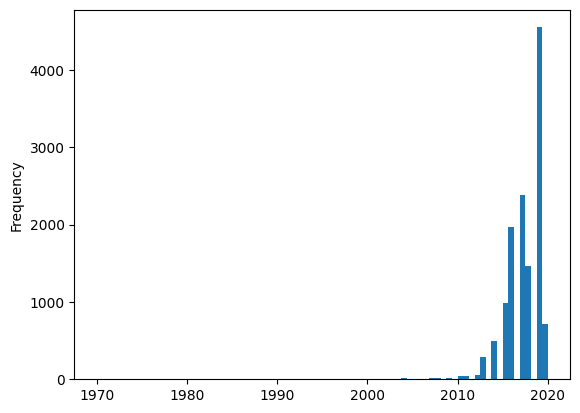

In [15]:
df['year'].plot.hist(bins=80)

In [16]:
df['year'].corr(df['mileage'])

-0.7380268515364232

In [17]:
df.corr()

<ipython-input-17-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [18]:
df.corrwith(df['price'])

<ipython-input-18-4af89057fcc9>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['price'])


year          0.520712
price         1.000000
mileage      -0.537214
tax           0.268717
mpg          -0.438445
engineSize    0.516126
dtype: float64

In [19]:
models = df['model'].unique()

In [20]:
models

array([' SLK', ' S Class', ' SL CLASS', ' G Class', ' GLE Class',
       ' GLA Class', ' A Class', ' B Class', ' GLC Class', ' C Class',
       ' E Class', ' GL Class', ' CLS Class', ' CLC Class', ' CLA Class',
       ' V Class', ' M Class', ' CL Class', ' GLS Class', ' GLB Class',
       ' X-CLASS', '180', ' CLK', ' R Class', '230', '220', '200'],
      dtype=object)

In [21]:
models.sort()
mpdels

NameError: ignored

In [22]:
models

array([' A Class', ' B Class', ' C Class', ' CL Class', ' CLA Class',
       ' CLC Class', ' CLK', ' CLS Class', ' E Class', ' G Class',
       ' GL Class', ' GLA Class', ' GLB Class', ' GLC Class',
       ' GLE Class', ' GLS Class', ' M Class', ' R Class', ' S Class',
       ' SL CLASS', ' SLK', ' V Class', ' X-CLASS', '180', '200', '220',
       '230'], dtype=object)

In [23]:
models = [" A Class", " B Class"]

In [25]:
df['model'].value_counts()

 C Class      3747
 A Class      2561
 E Class      1953
 GLC Class     960
 GLA Class     847
 B Class       591
 CL Class      511
 GLE Class     461
 SL CLASS      260
 CLS Class     237
 V Class       207
 S Class       197
 GL Class      121
 SLK            95
 CLA Class      86
 X-CLASS        82
 M Class        79
 GLS Class      74
 GLB Class      19
 G Class        15
 CLK             7
 CLC Class       3
 R Class         2
180              1
230              1
220              1
200              1
Name: model, dtype: int64

In [26]:
fltr = df['model'].isin(models)

In [28]:
fltr

0        False
1        False
2        False
3        False
4        False
         ...  
13114    False
13115     True
13116    False
13117    False
13118    False
Name: model, Length: 13119, dtype: bool

In [29]:
df[fltr]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10,A Class,2020,32980,Automatic,606,Petrol,145,35.8,2.0
11,A Class,2020,26980,Automatic,1000,Diesel,145,62.8,1.5
12,B Class,2019,23750,Automatic,278,Diesel,145,55.4,2.0
15,B Class,2017,15890,Automatic,24841,Diesel,150,68.9,1.5
18,B Class,2017,17513,Automatic,14128,Diesel,150,68.9,2.1
...,...,...,...,...,...,...,...,...,...
13073,B Class,2019,19350,Automatic,13674,Petrol,145,45.6,1.3
13090,A Class,2015,12995,Automatic,34665,Diesel,20,70.6,1.5
13109,A Class,2017,16499,Automatic,20477,Diesel,145,68.9,2.1
13111,B Class,2019,19344,Automatic,15257,Petrol,145,45.6,1.3
